In [122]:
import numpy as np
import pandas as pd
import geopandas as gpd
import datetime
import matplotlib.pyplot as plt

from shapely.geometry import Point

## Emplacement des stations

In [192]:
tableau_stations_file = "../Data/Seine/Stations_2019.csv"
gdf = gpd.read_file(tableau_stations_file)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [193]:
gdf['geometry'] = gdf.apply(lambda x: Point(float(x['X (m)']), float(x['Y (m)'])), axis = 1)
gdf = gdf.set_crs('EPSG:27572')
gdf = gdf.to_crs(world.crs)
gdf

,Code station,Libelle station,Regime influencé,Altitude du zéro de l'échelle,Coordonnées,X (m),Y (m),geometry
0,H0020010,La Seine à Quemigny-sur-Seine [Cosne],pas ou faiblement,288.05,Lambert II Étendu,775157,2300217,POINT (4.66954 47.67808)
1,H0100010,La Seine à Nod-sur-Seine,pas ou faiblement,248.25,Lambert II Étendu,767439,2309604,POINT (4.57034 47.76448)
2,H0100020,La Seine à Plaines-Saint-Lange,pas ou faiblement,179.35,Lambert II Étendu,760029,2335130,POINT (4.48082 47.99581)
3,H0400010,La Seine à Bar-sur-Seine,pas ou faiblement,148,Lambert II Étendu,751916,2348365,POINT (4.37676 48.11672)
4,H0400020,La Seine à Courtenot,pas ou faiblement,0,Lambert II Étendu,746950,2351620,POINT (4.31119 48.14712)
5,H0800011,La Seine [partielle] à Troyes [Foicy],fortement,102,Lambert II Étendu,731065,2368493,POINT (4.10290 48.30219)
6,H0800012,La Seine [partielle] à Troyes [Tauxelles],fortement,100,Lambert II Étendu,729271,2369769,POINT (4.07911 48.31402)
7,H0810010,La Seine à Méry-sur-Seine [après création gran...,fortement,78,Lambert II Étendu,714764,2390999,POINT (3.88926 48.50758)
8,H1700010,La Seine à Pont-sur-Seine,fortement,60,Lambert II Étendu,692920,2392352,POINT (3.59406 48.52325)
9,H1940020,La Seine à Bazoches-lès-Bray [station ultrason],fortement,52.59,Lambert II Étendu,663190,2381000,POINT (3.19008 48.42479)


In [194]:
world[world['name'] == "France"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."


<AxesSubplot:>

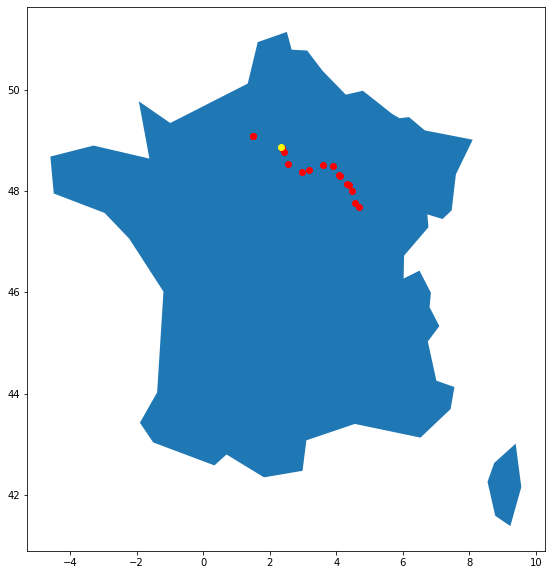

In [273]:
france = world[world['name'] == "France"].geometry.explode()[[1,2]].unary_union
base = gpd.GeoSeries(france).plot(figsize = (10, 10))
gdf.to_crs(world.crs).plot(ax = base, color = "red")
cities[cities['name'] == "Paris"].plot(ax = base, color = "yellow")

## Explorations

In [274]:
tableau_stations = pd.read_csv(tableau_stations_file,
                              sep = ";")
mesures = pd.read_csv("../Data/Seine/" + tableau_stations["Code station"][0] + "_2019.csv",
                      sep = ";")[["Date"]]
n_stations = tableau_stations.shape[0]

In [275]:
for index, row in tableau_stations.iterrows():
    code = row["Code station"]
    print(code)
    station = pd.read_csv("../Data/Seine/" + code + "_2019.csv",
                      sep = ";")
    station = station.rename(columns = {"Q (m3/s)": code})
    mesures = mesures.merge(station[["Date", code]],
                           on = "Date",
                           how = "outer")

H0020010
H0100010
H0100020
H0400010
H0400020
H0800011
H0800012
H0810010
H1700010
H1940020
H2900011
H3930020
H4340020
H5920011
H5920014
H8100020
H8100021


In [276]:
mesures["Date"] = pd.to_datetime(mesures["Date"])
mesures = mesures.sort_values(by = "Date")
mesures.head()

,Date,H0020010,H0100010,H0100020,H0400010,H0400020,H0800011,H0800012,H0810010,H1700010,H1940020,H2900011,H3930020,H4340020,H5920011,H5920014,H8100020,H8100021
0,2019-01-01 00:00:00,3.22,4.66,13.9,30.1,10.9,3.02,17.0,17.1,43.6,36.9,NaN,144.0,150.0,138.0,261.0,NaN,429.0
1,2019-01-01 02:00:00,3.20,4.60,13.8,29.8,11.5,3.03,16.8,17.1,43.5,38.3,NaN,147.0,158.0,133.0,251.0,NaN,354.0
2,2019-01-01 04:00:00,3.15,4.57,13.7,29.6,11.4,3.04,16.7,17.2,43.3,40.1,NaN,161.0,157.0,126.0,247.0,NaN,308.0
3,2019-01-01 06:00:00,3.11,4.54,13.5,29.3,11.2,3.04,16.5,17.3,43.1,40.2,NaN,163.0,161.0,118.0,245.0,NaN,304.0
4,2019-01-01 08:00:00,3.08,4.48,13.4,29.1,11.1,3.04,16.5,17.3,43.1,38.9,NaN,148.0,167.0,114.0,240.0,NaN,308.0


In [277]:
mesures.describe(include = "all")

,Date,H0020010,H0100010,H0100020,H0400010,H0400020,H0800011,H0800012,H0810010,H1700010,H1940020,H2900011,H3930020,H4340020,H5920011,H5920014,H8100020,H8100021
count,4380,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4007.000000,4380.000000,4380.000000,3676.000000,4380.000000,770.000000,4379.000000
unique,4380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-07-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.266792,3.110822,8.040532,18.409879,10.266619,8.711340,14.468632,22.245114,48.492534,41.830187,117.508186,145.500457,156.277329,227.717519,245.017169,537.844156,359.080110
std,NaN,3.048225,4.216932,8.007153,21.390395,9.877947,11.555978,4.979339,13.700793,27.023177,27.481360,87.638521,105.708836,111.001536,113.491777,174.544430,338.878582,237.471412
min,NaN,0.160000,0.200000,1.560000,2.130000,1.720000,1.810000,6.890000,11.400000,23.900000,9.340000,35.100000,41.300000,32.900000,99.600000,71.900000,169.000000,27.700000
25%,NaN,0.310000,0.400000,2.220000,3.020000,3.270000,2.567500,11.000000,15.200000,33.900000,25.300000,58.500000,70.300000,74.275000,158.000000,116.000000,294.000000,182.000000


On trie les stations d'Est en Ouest et du Sud au Nord.

In [374]:
tableau_stations["Ord"] = gdf["geometry"].apply(lambda x: x.coords[:][0][1])
tableau_stations["Abs"] = gdf["geometry"].apply(lambda x: x.coords[:][0][0])
tableau_stations

,Code station,Libelle station,Regime influencé,Altitude du zéro de l'échelle,Coordonnées,X (m),Y (m),Abs,Ord
0,H0020010,La Seine à Quemigny-sur-Seine [Cosne],pas ou faiblement,288.05,Lambert II Étendu,775157,2300217,4.669536,47.678077
1,H0100010,La Seine à Nod-sur-Seine,pas ou faiblement,248.25,Lambert II Étendu,767439,2309604,4.570344,47.764483
2,H0100020,La Seine à Plaines-Saint-Lange,pas ou faiblement,179.35,Lambert II Étendu,760029,2335130,4.480821,47.995810
3,H0400010,La Seine à Bar-sur-Seine,pas ou faiblement,148.00,Lambert II Étendu,751916,2348365,4.376762,48.116723
4,H0400020,La Seine à Courtenot,pas ou faiblement,0.00,Lambert II Étendu,746950,2351620,4.311194,48.147122
5,H0800011,La Seine [partielle] à Troyes [Foicy],fortement,102.00,Lambert II Étendu,731065,2368493,4.102904,48.302190
6,H0800012,La Seine [partielle] à Troyes [Tauxelles],fortement,100.00,Lambert II Étendu,729271,2369769,4.079115,48.314019
7,H0810010,La Seine à Méry-sur-Seine [après création gran...,fortement,78.00,Lambert II Étendu,714764,2390999,3.889262,48.507577
8,H1700010,La Seine à Pont-sur-Seine,fortement,60.00,Lambert II Étendu,692920,2392352,3.594062,48.523246
9,H1940020,La Seine à Bazoches-lès-Bray [station ultrason],fortement,52.59,Lambert II Étendu,663190,2381000,3.190077,48.424787


In [380]:
tri = tableau_stations.sort_values(by = "Ord", ascending=True).sort_values(by = "Abs", ascending=False)[["Code station"]]
tri["Order"] = 

,Code station
0,H0020010
1,H0100010
2,H0100020
3,H0400010
4,H0400020
5,H0800011
6,H0800012
7,H0810010
8,H1700010
9,H1940020


In [382]:
1:10

SyntaxError: illegal target for annotation (<ipython-input-382-fb572e210018>, line 1)

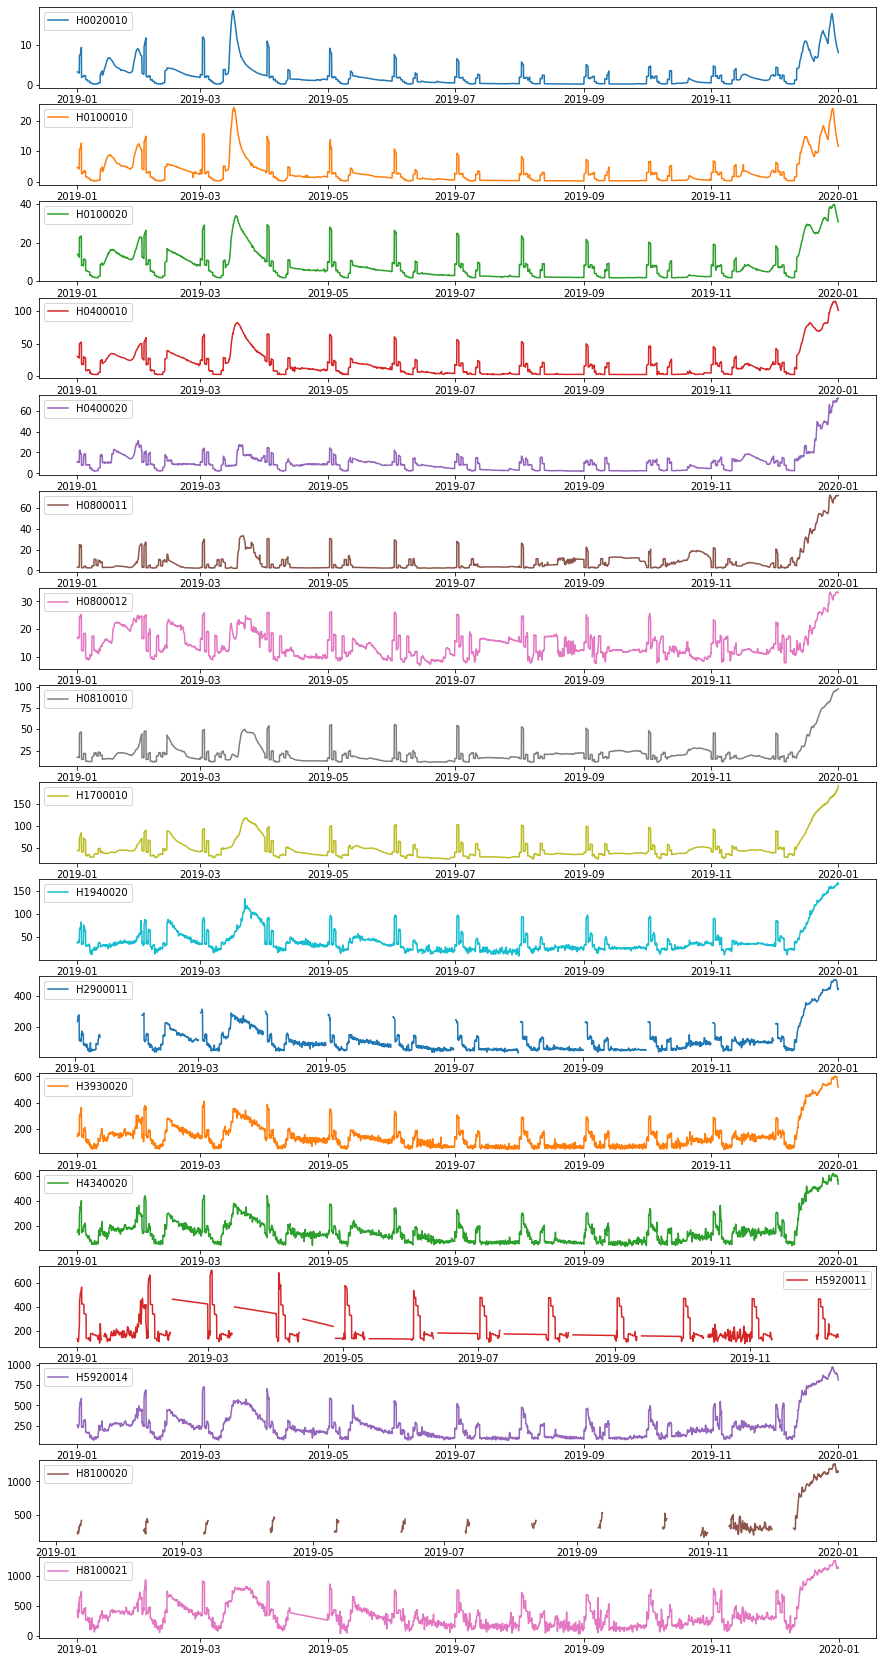

In [321]:
fig, axs = plt.subplots(n_stations, 1, figsize = (15,30))
for i in range(n_stations):
    code = tableau_stations["Code station"][i]
    axs[i].plot(mesures["Date"], mesures[code], label = code, color = "C"+str(i))
    axs[i].legend()

In [302]:
code

'H8100021'

C:\Users\zhouj\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\zhouj\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\zhouj\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\zhouj\Anaconda3\lib\site-packages\pandas\plotting\_matpl

<AxesSubplot:xlabel='Date'>

In [319]:
plt.colors()

AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

In [95]:
30

'H0020010'

In [217]:
mesures[1:1]

,Date,H0020010,H0100010,H0100020,H0400010,H0400020,H0800011,H0800012,H0810010,H1700010,H1940020,H2900011,H3930020,H4340020,H5920011,H5920014,H8100020,H8100021
1,2019-01-01 02:00:00,3.20,4.60,13.8,29.8,11.5,3.03,16.8,17.1,43.5,38.3,NaN,147.0,158.0,133.0,251.0,NaN,354.0
2,2019-01-01 04:00:00,3.15,4.57,13.7,29.6,11.4,3.04,16.7,17.2,43.3,40.1,NaN,161.0,157.0,126.0,247.0,NaN,308.0
3,2019-01-01 06:00:00,3.11,4.54,13.5,29.3,11.2,3.04,16.5,17.3,43.1,40.2,NaN,163.0,161.0,118.0,245.0,NaN,304.0
4,2019-01-01 08:00:00,3.08,4.48,13.4,29.1,11.1,3.04,16.5,17.3,43.1,38.9,NaN,148.0,167.0,114.0,240.0,NaN,308.0
5,2019-01-01 10:00:00,3.07,4.36,13.3,28.9,11.0,3.04,16.7,17.2,43.0,38.2,NaN,145.0,171.0,113.0,227.0,NaN,370.0
6,2019-01-01 12:00:00,3.03,4.24,13.2,28.7,10.8,3.04,17.0,17.1,43.0,39.8,NaN,154.0,168.0,124.0,238.0,NaN,454.0
7,2019-01-01 14:00:00,2.99,4.21,13.0,28.5,10.7,3.04,17.0,17.1,42.9,42.0,NaN,163.0,169.0,136.0,240.0,NaN,542.0
8,2019-01-01 16:00:00,2.99,4.20,12.9,28.4,10.8,3.04,17.0,17.0,42.9,43.0,NaN,168.0,151.0,160.0,251.0,NaN,554.0
9,2019-01-01 18:00:00,2.96,4.20,12.9,28.2,10.6,3.05,17.0,16.9,43.0,42.2,NaN,162.0,127.0,197.0,265.0,NaN,490.0
10,2019-01-01 20:00:00,2.92,4.19,12.4,28.0,11.2,3.05,17.0,16.8,42.9,40.5,NaN,155.0,138.0,234.0,276.0,NaN,443.0
